# Imports

In [1]:
import pandas as pd


## Customize

In [2]:
# Customize Pandas settings (eg: DataFrame display)
# Columns
pd.options.display.max_columns = 10
pd.options.display.max_colwidth = 15
pd.options.display.width = 150
# Rows
pd.options.display.max_rows = pd.options.display.min_rows = 6


# Load Data

We will be using ugly holiday sweater data crowdsourced from R-Ladies (and friends) in November/December 2020. If you would like to contribute your own ugly holiday sweater info to this dataset, please fill out this Google Form! See a summary of the data attributes here:

    sweater: entry number
    hs_tf: Do you have a holiday sweater? (Yes/No/NA)
    sparkly: is it sparkly? (Yes/No/NA)
    noise: does it make noise? (Yes/No/NA)
    lights: does it light up? (Yes/No/NA)
    objects: does it have anything attached to it? (Yes/No/NA)
    colors: What colors does it have?
    image_tf: Does it have an image on it? (Yes/No/NA)
    image_desc: User-provided image description


In [3]:
fnm = 'ugly_sweaters.csv'
df = pd.read_csv(fnm, index_col='sweater')
# Show the dataframe
print(f'df shape:\n{df.shape}')
print(f'\nColumn names:\n{df.columns.to_list()}\n')
print(df)

df shape:
(105, 8)

Column names:
['hs_tf', 'sparkly', 'noise', 'lights', 'objects', 'colors', 'image_tf', 'image_desc']

           hs_tf sparkly noise lights objects          colors image_tf      image_desc
sweater                                                                               
sweater1     Yes     Yes    No     No      No  Red, Yellow...      Yes  octopus dre...
sweater2     Yes      No    No     No      No           Green       No             NaN
sweater3     Yes      No    No     No      No  Red, Yellow...      Yes          Houses
...          ...     ...   ...    ...     ...             ...      ...             ...
sweater105   Yes      No    No     No      No  Red, Green,...       No             NaN
sweater106    No      No    No     No      No             NaN       No             NaN
sweater107   Yes      No    No     No     Yes  Red, Green,...      Yes  a llama wea...

[105 rows x 8 columns]


## Filter Data

In [4]:
# Filter to only include Holiday Sweaters
data = df.loc[df.hs_tf == 'Yes']
# Make a copy (instead of a view) since we'll be changing
# col dtypes later and don't want to get SettingWithCopyWarning
data = data.copy()
print(data)

           hs_tf sparkly noise lights objects          colors image_tf      image_desc
sweater                                                                               
sweater1     Yes     Yes    No     No      No  Red, Yellow...      Yes  octopus dre...
sweater2     Yes      No    No     No      No           Green       No             NaN
sweater3     Yes      No    No     No      No  Red, Yellow...      Yes          Houses
...          ...     ...   ...    ...     ...             ...      ...             ...
sweater104   Yes     Yes    No     No     Yes  Red, White,...      Yes  R2D2 wearin...
sweater105   Yes      No    No     No      No  Red, Green,...       No             NaN
sweater107   Yes      No    No     No     Yes  Red, Green,...      Yes  a llama wea...

[68 rows x 8 columns]


# Wrangle Data

In [5]:
print(data.colors)

sweater
sweater1      Red, Yellow...
sweater2               Green
sweater3      Red, Yellow...
                   ...      
sweater104    Red, White,...
sweater105    Red, Green,...
sweater107    Red, Green,...
Name: colors, Length: 68, dtype: object


In [6]:
# Convert 'colors' column from single comma-delim str to list
# of string
data.colors = data.colors.str.split(',')
print(data.colors)

sweater
sweater1      [Red,  Yell...
sweater2             [Green]
sweater3      [Red,  Yell...
                   ...      
sweater104    [Red,  Whit...
sweater105    [Red,  Gree...
sweater107    [Red,  Gree...
Name: colors, Length: 68, dtype: object


In [169]:
# Step 2 Wrangle Data
data['colors'] = data['colors'].str.split(',')
color_data = data.explode('colors').groupby('sweater').count()
data['num_colors'] = color_data['hs_tf']

data['image_desc'] = data['image_desc'].str.split(' ')
description_data = data.explode('image_desc').groupby('sweater').count()

data['num_words'] = description_data['hs_tf']
print(data)

           hs_tf sparkly noise lights objects  colors image_tf      image_desc  num_colors  num_words
sweater                                                                                              
sweater1     Yes     Yes    No     No      No     NaN      Yes  [octopus, d...           1          4
sweater2     Yes      No    No     No      No     NaN       No             NaN           1          1
sweater3     Yes      No    No     No      No     NaN      Yes        [Houses]           1          1
sweater5     Yes      No    No     No      No     NaN      Yes         [T-rex]           1          1
sweater8     Yes      No   Yes    Yes     Yes     NaN       No             NaN           1          1
...          ...     ...   ...    ...     ...     ...      ...             ...         ...        ...
sweater100   Yes     Yes    No     No     Yes     NaN      Yes       [Menorah]           1          1
sweater103   Yes      No   Yes     No     Yes     NaN      Yes         [Sloth]    

<AxesSubplot:xlabel='num_colors', ylabel='num_words'>

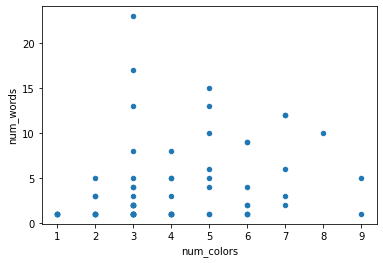

In [50]:
# Step 3 Visualize
data.plot.scatter('num_colors', 'num_words')